# Machine Learning and Neural Networks End-Term Assignment

## Introduction

### Objective
This project aims to show how a neural network can be used with TensorFlow to classify handwritten numbers. The objective is to precisely predict the digit represented in each image in the MNIT dataset by utilizing a model that was created only with TensorFlow's Sequential API, including the Dense and Dropout layers. In this project, a traditional computer vision problem will be used to demonstrate the principles of deep learning and TensorFlow.

### Dataset Overview
The MNIST dataset which is popular in machine learning and computer vision, contains 70,000 grayscale images of handwritten digits (0-9), includes 60,000 training images and 10,000 test images, each 28x28 pixels with pixel intensity ranging from 0 to 255. Its diverse handwriting styles and simplicity make it ideal for training and testing image classification models.

### Significance
The task of recognizing handwritten digits is essential for advancing in image recognition and computer vision tasks. Precise image classification is vital for applications such as form processing, license plate recognition, and authentication systems. By mastering this challenge, we gain expertise in constructing and training neural networks, preparing for more complex problems. This project aligns with the deep learning workflow from "Deep Learning with Python," focusing on best practices in model creation, training, and assessment. Our strategy involves utilizing only Dense and Dropout layers for the model, highlighting the strength of simplicity and neural network learning capabilities.

## Data Loading and Preprocessing
The MNIST dataset would be loaded using TensorFlow's built-in functions. Since the dataset has already been split into its training and testing sets, it would simplify the initial data handling. 

### Normalization
The value of the pixels will be scaled from a range of 0-255 to 0-1. This is an important step because it helps to significantly reduce the model's training time and improve the model's performance by maintaining a consistent scale for all the inputs.

### Reshaping
The MNIST dataset contains images of 28x28 pixels and the initial format is a 2D array. The structure needs to be flattened into a 1D array before feeding it into the fully connected neural network. This is also an important step as the dense layers expect input vectors of a fixed size. Additionally, the labels for the images are transformed using one-hot encoded vectors. This will convert the categorical labels into a format where each label is represented by an array that has a '1' in the position corresponding to the class and a '0' elsewhere, matching the network's output later for effective learning.

## Visualisation
Once all the data has been loaded and preprocessed, a few images from the dataset will be plotted. This allows us to observe the variability in handwriting styles across different digits, which shows the challenges the neural networks must overcome to achieve accurate classification.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Hiding INFO and WARNING messages from TensorFlow and only showing errors
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

In [2]:
# Loading the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Normalizing the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flattening the images
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Using One Hot Encoder to encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

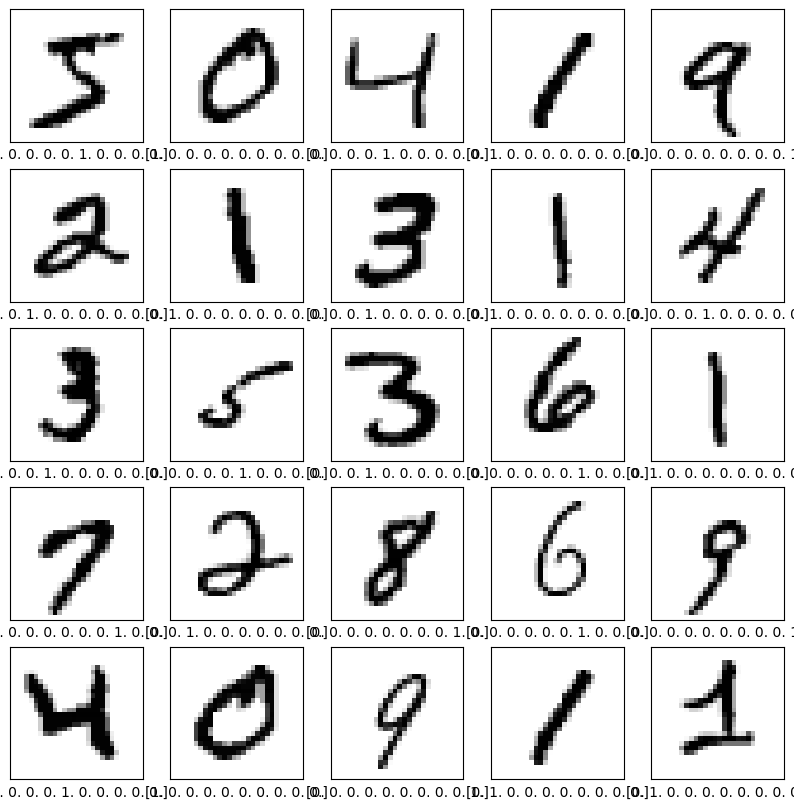

In [4]:
# Visualization
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Baseline Model
TensorFlow's Sequential API will be used to create the baseline model in this assignment. The model will incorporate a hidden layer which is equipped with 128 neurons and uses the ReLU activation function to introduce non-linearity, which enables it to capture intricate patterns within the dataset. The output layer would feature 10 neurons, each representing a digit in the dataset in this case from 0 to 9, and employs a softmax activation function. This would convert the logits to probabilities to predict the digit within the image.

In [5]:
# Defining the baseline model
baseline_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)), # First Dense layer with 128 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons for classifying digits
])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compiling the Baseline Model
For the baseline model, 'adam' optimizer was chosen due to its adaptive learning rate which makes it suitable for tasks like MNIST. The 'categorial_crossentropy' loss function was chosen due to its efficiency in multi-class classification scenarios. Lastly, the 'accuracy' metric was chosen as it provides a direct insight into the percentage of images that are correctly classified.

In [6]:
# Compile the model
baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

## Training the Baseline Model

In [7]:
# Train the baseline model
history = baseline_model.fit(train_images, 
                             train_labels, 
                             epochs=10, 
                             batch_size=32, 
                             validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2868 - accuracy: 0.9179 - val_loss: 0.1601 - val_accuracy: 0.9544
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1273 - accuracy: 0.9619 - val_loss: 0.1235 - val_accuracy: 0.9643
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0874 - accuracy: 0.9737 - val_loss: 0.1033 - val_accuracy: 0.9693
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0652 - accuracy: 0.9803 - val_loss: 0.0968 - val_accuracy: 0.9702
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0503 - accuracy: 0.9849 - val_loss: 0.0882 - val_accuracy: 0.9742
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.0862 - val_accuracy: 0.9755
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0906 - val_accuracy:

In [8]:
# Evaluating the Baseline Model
test_loss, test_acc = baseline_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}, Test Loss: {test_loss}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.9773
Test Accuracy: 0.9772999882698059, Test Loss: 0.08178557455539703


## Baseline Model Evaluation
The evaluation of the baseline model over 10 epochs illustrates significant learning and generalization capabilities. The initial accuracy of 91.79% and a validation accuracy of 95.44%, demonstrated the model's effectiveness in recognizing handwritten digits and its ability to generalize unseen data. Progressing through the epochs, both the training accuracy and validation accuracy improved consistently ending at 99.49% training accuracy and 97.68% validation accuracy at the final epoch, suggesting minimal overfitting. The validation accuracy serves as a critical metric for assessing the model's generalization ability as it reflects the model's performance on unseen data. The close alignment between the training accuracy and validation accuracy suggests that the baseline model has achieved a balance between studying the training data and also generalizing the unseen data. The model evaluation on the test set also confirmed its robustness with a final test accuracy of 97.73% and a loss of 0.0818. These results further validate the model's performance and showcase the potential of using a baseline neural network model for digit classification tasks.

## Complex Sequential Model
Based on the good performance observed from the baseline model, a complex model was developed to further explore the capabilities and limits of deep learning architectures. The complex model significantly increases the model's capability by using multiple dense layers with a higher number of neutrons (1024 and 512) and uses the dropout layers with a rate of 0.2 to mitigate the risk of overfitting. The idea behind this was to capture more intricate patterns in the data that the baseline model might overlook. The dropout layers would aim to reduce overfitting by randomly ignoring a subset of neurons during the training process. This will encourage the model to learn and generalize better. The objective of this model is to maintain a balance between learning and generalization to push the boundaries of accuracy on the MNIST classification.

In [9]:
complex_model = Sequential([
    Dense(1024, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

## Compilation
Adam optimizer and categorical_crossentropy will be used as the loss function, and accuracy as the metric.

Adam optimizer was chosen as it is effective in handling sparse gradients and its adaptive learning rate properties.

Categorical Cross entropy is chosen as this is a multi-class classification problem and would be appropriate as it measures the distance between the probability distribution output by the model and the true distribution of the labels.

Accuracy Metric provides a straightforward interpretation of the model's performance.

In [10]:
# Compiling the model
complex_model.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

In [11]:
history = complex_model.fit(train_images, 
                            train_labels,
                            epochs=20,
                            batch_size=128,
                            validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 5s 11ms/step - loss: 0.2548 - accuracy: 0.9217 - val_loss: 0.1278 - val_accuracy: 0.9597
Epoch 2/20
375/375 [==============================] - 4s 11ms/step - loss: 0.1092 - accuracy: 0.9666 - val_loss: 0.0934 - val_accuracy: 0.9705
Epoch 3/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0779 - accuracy: 0.9750 - val_loss: 0.1025 - val_accuracy: 0.9697
Epoch 4/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0625 - accuracy: 0.9808 - val_loss: 0.1063 - val_accuracy: 0.9684
Epoch 5/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.0875 - val_accuracy: 0.9761
Epoch 6/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0445 - accuracy: 0.9857 - val_loss: 0.0968 - val_accuracy: 0.9735
Epoch 7/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0881 - val_accuracy: 0.9773

In [12]:
test_loss, test_acc = complex_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}, Test Loss: {test_loss}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9827
Test Accuracy: 0.982699990272522, Test Loss: 0.08995852619409561


## Model Evaluation
Judging from the model's performance over 20 epochs, there is a trend that suggests overfitting. Initially, both the training and validation accuracies improve showing the model's capability to learn from the training data. On the final epoch, the model achieves a high training accuracy of 99.36% and validation accuracy of 98.20%, which indicates strong learning from the training dataset.

However, the divergence between the training loss and validation loss highlights overfitting's impact. While the training loss is consistently decreasing to 0.0214, meaning the model is becoming more accurate on the data the validation loss increases to 0.1062 on the last epoch. The rise in validation loss despite a high overall validation accuracy, suggests that the model starts to memorize the training data as compared to learning and generalizing the data.

Overfitting occurs when a model learns the details and the noise in the training data to the extent in which it is negatively impacting the model's performance on new data. This means that the model fits too closely to the training dataset, capturing patterns that do not generalize the unseen data. This will often result in high accuracy on the training data but a significantly lower validation accuracy, which indicates the model's inability to perform well on unseen data.

## Hyperparameter Tuning
To combat the issue of overfitting as seen from the complex model above, regularization techniques such as dropout layers are introduced, which randomly deactivate a portion of neurons during training which ensures the model can generalize well by preventing the neurons from co-adapting too closely. Therefore, hyperparameter tuning is crucial in optimizing the parameters such as the learning rate, batch size, and architecture to enhance the model's performance.

TensorFlow's Keras Tuner would be used to implement the hyperparameter tuning strategy. Through the MyHyperModel class, the process dynamically adjusts several parameters such as the number of neurons in the initial dense layer, dropout rate, and learning rate, and aims to optimize the model's performance. The class, initiated with the model's input shape, constructs a neural network architecture that incorporates these hyperparameters. It uses the 'hp' object to define a search space for each of the hyperparameters, allowing the RandomSearch tuner to experiment across a predefined range of values. The goal would be to explore various models to identify the optimal set of hyperparameters that enhances the model's accuracy and generalization capabilities on unseen data.

In [13]:
from tensorflow import keras
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                        activation='relu', input_shape=self.input_shape))
        model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.05)))
        model.add(Dense(10, activation='softmax'))
        
        model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

C:\Users\teoqi\AppData\Local\Temp\ipykernel_28100\1894588720.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


## RandomSearch Tuner
The RandomSearch tuner is used to optimize the model and aims to enhance the validation accuracy. It conducts up to 10 trials, each with 2 executions. The trials are then saved in the directory named 'Hypertuning' under the project 'Results', facilitating easy access and review of the tuning process. Each trial explores different combinations of hyperparameters over 10 epochs with 20% of the training data reserved for validation.

In [14]:
hypermodel = MyHyperModel(input_shape=(784,))

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='Hypertuning',
    project_name='Results'
)

tuner.search(train_images, train_labels, epochs=10, validation_split=0.2)

Trial 10 Complete [00h 01m 13s]
val_accuracy: 0.9785000085830688

Best val_accuracy So Far: 0.9796249866485596
Total elapsed time: 00h 11m 53s


In [15]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Evaluate the best model
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f"Best model test accuracy: {test_acc}, test loss: {test_loss}")

# Printing the hyperparameters of the best model
print("Best Hyperparameters:")
print("Units:", best_hyperparameters.get('units'))
print("Dropout rate:", best_hyperparameters.get('dropout'))
print("Learning rate:", best_hyperparameters.get('learning_rate'))

print("Best Model Architecture:")
best_model.summary()

313/313 [==============================] - 1s 1ms/step - loss: 0.0772 - accuracy: 0.9802
Best model test accuracy: 0.9801999926567078, test loss: 0.07717946916818619
Best Hyperparameters:
Units: 448
Dropout rate: 0.2
Learning rate: 0.001
Best Model Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 448)               351680    
                                                                 
 dropout (Dropout)           (None, 448)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                4490      
                                                                 
Total params: 356170 (1.36 MB)
Trainable params: 356170 (1.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Final Model
From the successful hyperparameter tuning process, the final model was crafted using the optimal parameters to enhance performance on the MNIST dataset. The best parameters were 448 units in the dense later, a dropout rate of 0.2, and a learning rate of 0.001 for efficient gradient descent optimization.

The model starts with an input layer that flattens the images to a 784-dimensional vector, followed by a dense layer with 448 neurons and uses the ReLU activation for nonlinear transformations. To mitigate overfitting a dropout rate of 20% will temporarily remove a portion of neurons during training. The final output dense layer with 10 neurons which represents the 10 digits and a softmax activation, classifies the digits.

This parameter scored a test accuracy of 98.02% and a test loss of 0.0772, showcasing the model's robust performance and its capabilities. With a total of 356,170 trainable parameters, the model was complex enough to capture the dataset's intricacies while still maintaining the ability to generalize the unseen data.

In [16]:
# Assigning the best hyperparameters from the tuner
units = best_hyperparameters.get('units')
dropout_rate = best_hyperparameters.get('dropout')
learning_rate = best_hyperparameters.get('learning_rate')

# Creating the model
final_model = Sequential([
    Flatten(input_shape=(784, )),
    Dense(units, activation='relu'),
    Dropout(dropout_rate),
    Dense(10, activation='softmax')
])

## Final Model Compilation and Training
The final model was compiled using Adam optimizer with a learning rate of 0.001 obtained from the hyperparameter tuning, categorical crossentropy as its loss function and accuracy as its metrics. The model then underwent training for 10 epochs, with a validation split of 20% to monitor performance and prevent overfitting. This is an important step in refining the model's ability to generalize from the training data to unseen data, improving its predictive accuracy on new inputs.

In [20]:
# Compling the final model
final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Training the final model
final_model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2470 - accuracy: 0.9277 - val_loss: 0.1255 - val_accuracy: 0.9628
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1099 - accuracy: 0.9678 - val_loss: 0.0974 - val_accuracy: 0.9703
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0776 - accuracy: 0.9756 - val_loss: 0.0910 - val_accuracy: 0.9731
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0594 - accuracy: 0.9815 - val_loss: 0.0796 - val_accuracy: 0.9762
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0473 - accuracy: 0.9843 - val_loss: 0.0809 - val_accuracy: 0.9764
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0862 - val_accuracy: 0.9767
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0317 - accuracy: 0.9894 - val_loss: 0.0930 - val_accuracy:

In [19]:
# Evaluating the final model
test_loss, test_acc = final_model.evaluate(test_images, test_labels)
print(f"Final model test accuracy: {test_acc}, test loss: {test_loss}")

313/313 [==============================] - 1s 1ms/step - loss: 0.0728 - accuracy: 0.9804
Final model test accuracy: 0.980400025844574, test loss: 0.07279576361179352


## Final Model Evaluation
The training process of the final model shows its effective learning capability and generalization to unseen data. The initial training accuracy of 92.77% and validation accuracy of 96.28% showcase a solid understanding of the dataset right from the start.

Progressing down the epochs, both accuracies improve consistently, further demonstrating the model's increasing proficiency in classifying the data. On the final epoch, the model reached a training accuracy of 99.28% and a validation accuracy of 97.94%. This significant improvement signifies the models' robustness and its capacity to learn from the training data effectively without overfitting shown by the close performance metrics between the training and validation datasets.

The final test on unseen data resulted in a test accuracy of 98.04% and a test loss of 0.0728, further demonstrating the model's ability to generalize well to new, unseen data. This makes the model a strong candidate for accurately classifying similar types of data in real-world applications. The balance between high accuracy and the ability to generalize indicates a well-tuned model that has leveraged the identified hyperparameters for optimal performance.

## Conclusion
Throughout this project, a total of 3 models were developed and assessed. A baseline model, a complex model and the final model are optimized through hyperparameter tuning. The journey from the baseline to the final model illustrates the balance between model complexity, learning capability, and generalization to unseen data.

The baseline model was used as a foundational benchmark, demonstrating the potential of the simplest model in achieving significant accuracy levels. This model serves as a baseline before progressing to more complex architectures.

The complex model was then created and was designed to push the boundaries of learning capacity and accuracy. Even though this model achieved higher accuracy on the training dataset, it also faced the challenge of overfitting, where the model learned from the training data too well, leading to decreased model performance.

To address the overfitting issue, the final model was created using parameters obtained from TensorFlow's Keras Tuner. This led to the creation of the optimized model that improved the accuracy of the baseline model and also maintained a commendable level of generalization. This model showcases the value of hyperparameter tuning in developing models that are both accurate and robust.

In conclusion, this project's progression from a simple baseline to an optimized final model showcases the iterative nature of machine learning model development. It highlights the significance of first understanding the dataset, followed by the exploration of more complex models to test the limits of accuracy, and the crucial role of hyperparameter tuning in balancing accuracy with the ability to generalize. This approach ensures that the development of models is not only high-performing but also reliable and adaptable to new unseen data.

## References
Chollet, F. (2019) Chapter 4. fundamentals of machine learning  · Deep Learning with Python. Available at: https://livebook.manning.com/book/deep-learning-with-python/chapter-4/16